# Attendance Data evaluation and prediction

## Basic Setup and Imports

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Pull in the data
- 2019-2013 data
- Combine data

In [82]:
games_h2h_2019 = pd.read_csv('Data/usa-mls-matches-2019-to-2019-stats.csv')
games_h2h_2018 = pd.read_csv('Data/usa-mls-matches-2018-to-2018-stats.csv')
games_h2h_2017 = pd.read_csv('Data/usa-mls-matches-2017-to-2017-stats.csv')
games_h2h_2016 = pd.read_csv('Data/usa-mls-matches-2016-to-2016-stats.csv')
games_h2h_2015 = pd.read_csv('Data/usa-mls-matches-2015-to-2015-stats.csv')
games_h2h_2014 = pd.read_csv('Data/usa-mls-matches-2014-to-2014-stats.csv')
games_h2h_2013 = pd.read_csv('Data/usa-mls-matches-2013-to-2013-stats.csv')
games_h2h_combined = games_h2h_2019.append(games_h2h_2018).append(games_h2h_2017).append(games_h2h_2016).append(games_h2h_2015).append(games_h2h_2014).append(games_h2h_2013)

## Preview Data

In [84]:
games_h2h_combined.head(20)

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1551549600,Mar 2 2019 - 6:00pm,complete,16498.0,Philadelphia Union,Toronto,0.0,0.0,2.06,1.25,1,3,4,1,0,1,73,"45'3,62,90'4",8,1,2,0,2,0,20,8,3,5,17,3,14,11,61,39,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Talen Energy Stadium
1,1551555000,Mar 2 2019 - 7:30pm,complete,25527.0,Orlando City,New York City,0.0,0.0,1.24,1.53,2,2,4,2,0,2,"59,75","13,45",2,4,3,0,2,0,15,19,6,8,9,11,9,10,56,44,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Orlando City Stadium
2,1551562200,Mar 2 2019 - 9:30pm,complete,17931.0,Columbus Crew,New York RB,0.0,0.0,1.35,1.00,1,1,2,2,1,1,41,6,9,3,4,0,2,0,12,12,5,5,7,7,-1,-1,53,47,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,MAPFRE Stadium
3,1551562200,Mar 2 2019 - 9:30pm,complete,14327.0,FC Dallas,New England Revolution,0.0,0.0,2.12,0.94,1,1,2,1,1,0,13,57,3,1,2,0,2,0,11,11,4,4,7,7,13,22,62,38,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Toyota Stadium
4,1551567600,Mar 2 2019 - 11:00pm,complete,27837.0,Vancouver Whitecaps,Minnesota United,0.0,0.0,1.18,1.00,2,3,5,2,1,1,"6,81","37,66,70",6,2,2,0,3,0,13,16,6,6,7,10,11,17,53,47,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,BC Place Stadium
5,1551567600,Mar 2 2019 - 11:00pm,complete,16827.0,Houston Dynamo,Real Salt Lake,0.0,0.0,2.00,0.89,1,1,2,1,0,1,62,40,9,8,2,1,4,0,10,15,3,6,7,9,11,9,52,48,0.0,0,0,0,0,0,0,0,0.0,0.0,1.23,5.70,11.25,1.2,1.67,2.65,0.0,2.10,1.67,BBVA Compass Stadium
6,1551567600,Mar 2 2019 - 11:00pm,complete,12717.0,Colorado Rapids,Portland Timbers,0.0,0.0,1.71,1.17,3,3,6,3,1,2,"16,46,90'4","29,45'1,66",4,17,0,1,2,0,11,20,5,5,6,15,10,13,42,58,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Dick's Sporting Goods Park
7,1551574800,Mar 3 2019 - 1:00am,complete,25866.0,LA Galaxy,Chicago Fire,0.0,0.0,2.00,0.65,2,1,3,0,0,0,"68,80",49,9,7,1,0,1,0,13,16,7,5,6,11,6,7,47,53,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Dignity Health Sports Park (Carson- California)
8,1551582000,Mar 3 2019 - 3:00am,complete,18000.0,SJ Earthquakes,Montreal Impact,0.0,0.0,1.88,0.82,1,2,3,3,1,2,11,"29,44",7,6,3,0,4,0,12,11,5,4,7,7,16,13,59,41,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Avaya Stadium
9,1551582000,Mar 3 2019 - 3:00am,complete,39011.0,Seattle Sounders,FC Cincinnati,0.0,0.0,2.30,0.71,4,1,5,4,3,1,"27,33,43,87",13,6,1,0,0,1,0,25,8,11,4,14,4,6,13,58,42,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,CenturyLink Field


## Creating a Pivot table to visualize Head-2-Head attendance
- Use [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) with 
 - index of home team, 
 - columns of away teams 
 - and attendance being the values
 - np.mean as the aggregate function
- Increase figure size for visibility of all data points
- Use [Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize data 
 

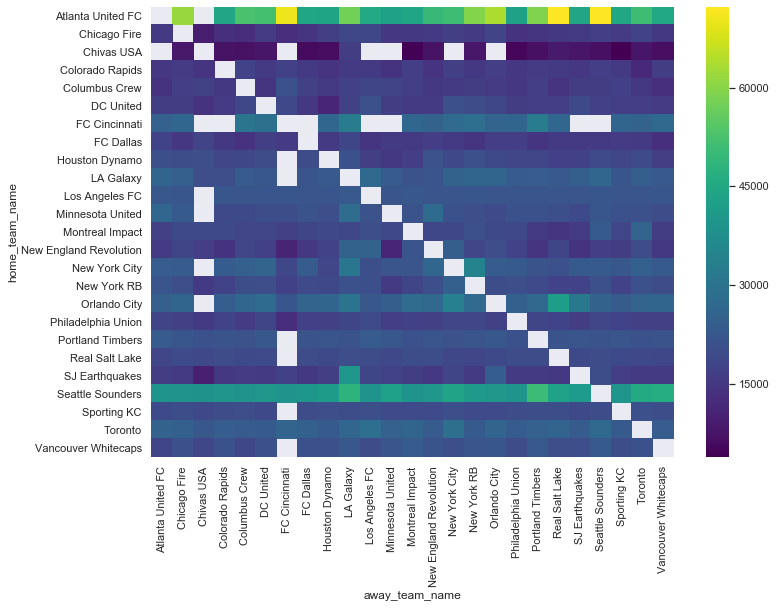

In [85]:
table = pd.pivot_table(games_h2h_combined, values='attendance', index='home_team_name', columns=['away_team_name'], aggfunc=np.mean)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(table, cmap='viridis')


... or you can also use cool/warm color mapping

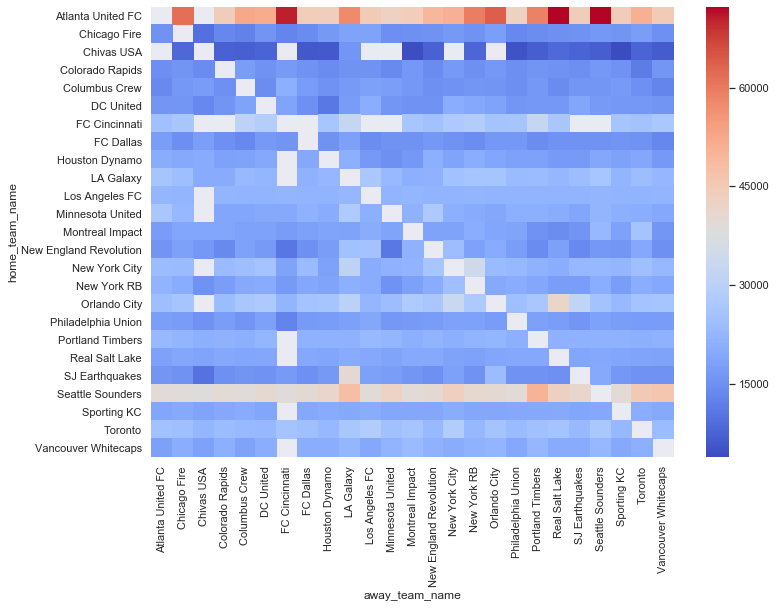

In [86]:
sns.heatmap(table, cmap='coolwarm')

# Homework
- Take max stadium capacity into account
- Normalize for it
- Visualize again